<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

In [ ]:
from google.colab import drive
import os

In [ ]:
#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

#Download kaggle image dataset into the directory
!kaggle competitions download -c titanic

#Check if they are downloaded
!ls

#Unzip the download and delete the zip file
!unzip \*.zip  && rm *.zip


In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print('train has {} rows and {} columns'.format(*train.shape))
print('test has {} rows and {} columns'.format(*test.shape))

train has 891 rows and 12 columns
test has 418 rows and 11 columns


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
train=train.dropna(subset=["Embarked"])
train=train.drop("Cabin", axis=1)
mean=train["Age"].mean()
train["Age"]=train["Age"].fillna(mean)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
print('There are {} different (unique) PassengerIds in the data'.format(train["PassengerId"].nunique()))
print('There are {} different (unique) names in the data'.format(train["Name"].nunique()))
print('There are {} different (unique) ticket numbers in the data'.format(train["Ticket"].nunique()))

There are 889 different (unique) PassengerIds in the data
There are 889 different (unique) names in the data
There are 680 different (unique) ticket numbers in the data


In [ ]:
train=train.drop("PassengerId", axis=1)
train=train.drop("Name", axis=1)
train=train.drop("Ticket", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for col in ['Sex', 'Embarked']:
  le.fit(train[col])
  train[col]=le.transform(train[col])

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# Feature Scaling to standardize the large and small values, such as age and fare

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)

print('The minimum value is {} and the maximum value is {}'.format(train.min(), train.max()))

The minimum value is 0.0 and the maximum value is 1.0


In [ ]:
from sklearn.model_selection import train_test_split

input_data=train[:,1:8]
labels=train[:, 0]

train_input, test_input, train_labels, test_labels = train_test_split(input_data, labels, test_size=0.2)

In [ ]:
#Saving the modified/split dataset

import numpy as np

with open('./train.npy', 'wb') as f:
  np.save(f, train_input)
  np.save(f, train_labels)

with open('./test.npy', 'wb') as f:
  np.save(f, test_input)
  np.save(f, test_labels)

### Baseline

In [ ]:
import random
random.seed(a=None, version=2)

#Predictor based on random simulation
def classify(passenger):
  return random.randint(0,1)

#Runner for classifier
def run(f_classify, x):
  return list(map(f_classify, x))

In [ ]:
# Randomly predicted result
result=run(classify, train_input)

In [ ]:
#Evaluation

def evaluate(predictions, actual):
  correct=list(filter(
      lambda item: item[0] == item[1],
      list(zip(predictions, actual))
  ))
  return '{} correct predictions out of {}. Accuracy {:.0f}%'.format(len(correct), len(actual), 100*len(correct)/len(actual))

print(evaluate(result, train_labels))

365 correct predictions out of 711. Accuracy 51%


In [ ]:
# The result when we predicted consistently death

def predict_death(input):
  return 0

print(evaluate(run(predict_death, train_input), train_labels))


439 correct predictions out of 711. Accuracy 62%


### Evaluation Methods

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
predictions = run(predict_death, train_input)
confusion_matrix(train_labels, predictions)

array([[439,   0],
       [272,   0]])

In [ ]:
# Listing 2.20: The precision score
from sklearn.metrics import precision_score
print('The precision score of the predict_death classifier is {}'
    .format(precision_score(train_labels, predictions)))

# Listing 2.21: The recall score
from sklearn.metrics import recall_score
print('The recall score of the predict_death classifier is {}'
    .format(recall_score(train_labels, predictions)))

#Ratio of True Negatives amongst all actual negatives
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

## Negative Predictive Value
def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

cm = confusion_matrix(train_labels, predictions)

print('The specificity score of the predict_death classifier is {:.2f}'.format(specificity(cm)))
print('The npv score of the predict_death classifier is {:.2f}'.format(npv(cm)))

The precision score of the predict_death classifier is 0.0
The recall score of the predict_death classifier is 0.0
The specificity score of the predict_death classifier is 1.00
The npv score of the predict_death classifier is 0.62


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Confusion Matrix for the randomly predicted result

random_predictions = run(classify, train_input)
random_cm = confusion_matrix(train_labels, random_predictions)

print('The precision score of the random classifier is {:.2f}'
    .format(precision_score(train_labels, random_predictions)))
print('The recall score of the random classifier is {:.2f}'
    .format(recall_score(train_labels, random_predictions)))
print('The specificity score of the random classifier is {:.2f}'
    .format(specificity(random_cm)))
print('The npv score of the random classifier is {:.2f}'
    .format(npv(random_cm)))

The precision score of the random classifier is 0.38
The recall score of the random classifier is 0.53
The specificity score of the random classifier is 0.48
The npv score of the random classifier is 0.62


In [ ]:
def hypocrite(passenger, weight):
  return round(min(1,max(0, weight*0.5+random.uniform(0,1))))

In [ ]:
w_predictions=run(lambda passenger: hypocrite(passenger, -0.5), train_input)

w_cm=confusion_matrix(train_labels, w_predictions)

print('The precision score of the hypocrite classifier is {:.2f}'.format(precision_score(train_labels, w_predictions)))
print('The recall score of the hypocrite classifier is {:.2f}'.format(recall_score(train_labels, w_predictions)))
print('The specificity score of the hypocrite classifier is {:.2f}'.format(specificity(w_cm)))
print('The npv score of the hypocrite classifier is {:.2f}'.format(npv(w_cm)))

The precision score of the hypocrite classifier is 0.39
The recall score of the hypocrite classifier is 0.26
The specificity score of the hypocrite classifier is 0.74
The npv score of the hypocrite classifier is 0.62


In [ ]:
# 40 steps between 0-1 for weights

import numpy as np

cnt_steps=40
steps=np.arange(0, cnt_steps,1).tolist()

weights=list(map(
    lambda weight: round(weight,2),
                 np.arange(-1,1+2/(cnt_steps-1), 2/(cnt_steps-1)).tolist()))

l_predictions=list(map(
    lambda step: run(
        lambda passenger: hypocrite(passenger, weights[step]),train_input),steps))

l_cm=list(map(
    lambda step: confusion_matrix(train_labels, l_predictions[step]), steps))


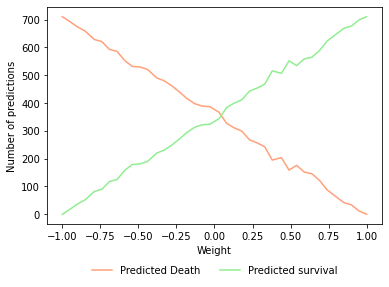

In [ ]:
import matplotlib.pyplot as plt
import matplotlib

#Graph for death

deaths, =plt.plot(
    weights, 
    list(map(lambda cur: l_cm[cur][0][0]+l_cm[cur][1][0], steps)),
    'lightsalmon',
    label='Predicted Death')

survivals, = plt.plot(
    weights,
    list(map(lambda cur: l_cm[cur][0][1]+l_cm[cur][1][1], steps)),
    'lightgreen',
    label='Predicted survival'
)

plt.legend(handles=[deaths, survivals], loc='upper center',
           bbox_to_anchor=(0.5, -0.15), framealpha=0.0, ncol=2)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

In [ ]:
l_precision = list(map(lambda step: precision_score(train_labels,
l_predictions[step]),steps))
l_recall = list(map(lambda step: recall_score(train_labels, l_predictions[step]),steps))
l_specificity = list(map(lambda step: specificity(l_cm[step]),steps))
l_npv = list(map(lambda step: npv(l_cm[step]),steps))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


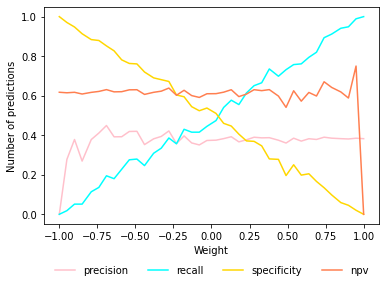

In [ ]:
m_precision, = plt.plot(weights, l_precision, 'pink', label="precision")
m_recall, = plt.plot(weights, l_recall, 'cyan', label="recall")
m_specificity, = plt.plot(weights, l_specificity, 'gold', label="specificity")
m_npv, = plt.plot(weights, l_npv, 'coral', label="npv")
plt.legend(
  handles=[m_precision, m_recall, m_specificity, m_npv], 
  loc='upper center',
  bbox_to_anchor=(0.5, -0.15),
  framealpha=0.0, ncol=4)
plt.xlabel("Weight")
plt.ylabel("Number of predictions")
plt.show()

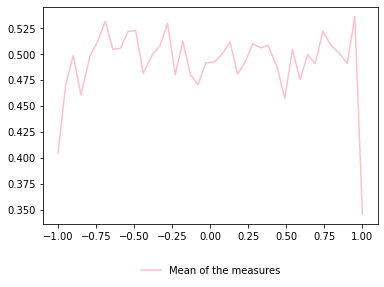

In [ ]:
l_mean=list(map(lambda step: sum(step)*0.25, zip(l_precision, l_recall, l_specificity, l_npv)))
m_mean, = plt.plot(weights, l_mean, 'pink', label="Mean of the measures")
plt.legend(handles=[m_mean], loc='upper center', 
           bbox_to_anchor=(0.5, -0.15), framealpha=0.0)
plt.ylim=(0,1.0)
plt.show()

In [ ]:
def classifier_report(name, run, classify, input, labels):
  cr_predictions=run(classify, input)
  cr_cm=confusion_matrix(labels, cr_predictions)
  
  cr_precision=precision_score(labels, cr_predictions)
  cr_recall=recall_score(labels, cr_predictions)
  cr_specificity=specificity(cr_cm)
  cr_npv=npv(cr_cm)
  cr_level=0.25*(cr_precision+cr_recall+cr_specificity+cr_npv)

  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
  print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
  print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
  print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
  print('The information level is: {:.2f}'.format(cr_level))

In [ ]:
classifier_report("Random PQC", run, classify, train_input, train_labels)

The precision score of the Random PQC classifier is 0.37
The recall score of the Random PQC classifier is 0.48
The specificity score of the Random PQC classifier is 0.49
The npv score of the Random PQC classifier is 0.60
The information level is: 0.49
